# Introduction to Bayesian Learning


## Numbers Dataset

In this assignment, we will apply a Bayesian classifier to recognise handwritten 5-digit zip-codes based on the MNIST dataset. The MNIST dataset is a set of handwritten digits, and our job is to build a python program that takes as input an image of a digit, and outputs what digit it is. We have a dataset of handwritten digits from 0 to 9.

## Naive Bayesian classifier 

What is Naive Bayes algorithm?

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. It is the supervised learning approach you would come up with if you wanted to model a predictive modeling problem probabilistically.

The probability of a class value given a value of an attribute is called the conditional probability. By multiplying the conditional probabilities together for each attribute for a given class value, we have a probability of a data instance belonging to that class.
$$p(x\vert y = i) = \Pi_i p(x_i | y)$$
Here x represents the image, or more precisely, the pixel values of the image formatted as a vector, and y represents the digit, which can be 0, 1, …, 9.

To make a prediction we can calculate probabilities of the instance belonging to each class and select the class value with the highest probability.
$$ \arg \max_i P(x|y = i)$$

We recall that pixels represent light intensity, and light intensity is actually continuous. It’s only discrete inside a computer because computers are discrete. A reasonable first-guess for modeling continuous data is the multivariate Gaussian or the multivariate Normal.
In this way we can use the Gaussian distribution:
$$ p(x\vert y = i) = \Pi_{i=0} N(x_i | \mu_i, \sigma_i²) = \Pi_{i=0} \frac{1}{\sqrt(2 \pi \sigma_i²)} \exp (\frac{-1}{2}\frac{(x-\mu_i)²}{\sigma_i²})$$

NOTE: Samples from normal distributions tend to cluster about the mean with a spread related to the standard deviation $\sigma$. We usually say that 
$$ p(x) \approx N(\mu, \sigma²)$$
where $\mu$ is the mean and $\sigma²$ is the variance.

Naive bases is often described using categorical data because it is easy to describe and calculate using ratios. A more useful version of the algorithm for our purposes supports numeric attributes and assumes the values of each numerical attribute are normally distributed (fall somewhere on a bell curve). Again, this is a strong assumption, but still gives robust results.

Naive bayes simplifies the calculation of probabilities by assuming that the probability of each attribute belonging to a given class value is independent of all other attributes. This is a strong assumption but results in a fast and effective method. In this way, Naive Bayes Classifier makes **independence assumptions** to get a diagonal covariance matrix. That's why it uses a much simpler 1D Gaussian version $$p(x_i, x_j) = p(x_i) p(x_j)$$

We can divide this part into the following tasks:

    Calculate Gaussian Probability Density Function
    Calculate Class Probabilities
    Make a Prediction
    Estimate Accuracy

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image



samples_per_class = 500
number_of_classes = 10

BASE_DIR = '/media/hi8826mo-s/BEEE-DE51/Ultimi/EDAN95_Applied_Machine_Learning/labs/lab6/'
filelist = sorted(glob.glob(BASE_DIR + 'data/*/*.png'))

x = np.array([np.array(Image.open(fname)) for fname in filelist])
y = np.zeros(number_of_classes * samples_per_class,dtype=int)

for cls in range(1,number_of_classes):
    y[(cls*500):(cls+1)*500] = cls   



## Visualizing the Dataset

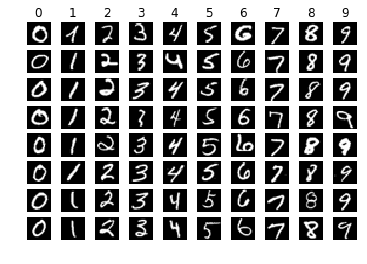

In [2]:
examples_per_class = 8

for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        
        if i == 0:
            plt.title(str(cls))
plt.show()

## Mean

compute the mean of each class and display

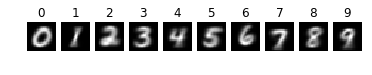

In [3]:
mean_of_class = np.zeros((10,20,20))

for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    mean_of_class[cls] = np.mean(x[idxs],axis=0)
    
    #print(x[idxs])
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
    
plt.show()


## Generate Training and Testing data, and visualize
we need to split the data into a training dataset that Naive Bayes can use to make predictions and a test dataset that we can use to evaluate the accuracy of the model.

In [55]:
#######################################################################
# x_train will contain the training data
# y_train will contain the correct classes of the training data
# x_test will contain the test data
# y_test will contain the correct classes for the test data
#######################################################################

x_train = np.zeros((4000,20,20))
y_train = np.zeros(4000)

x_test = np.zeros((1000,20,20))
y_test = np.zeros(1000)

for cls in range(number_of_classes):
    idx = cls*400
    idx1 = cls*500
    idx2 = cls*100
    
    x_train[idx:idx+400,:,:] = x[idx1:idx1+400,:,:]
    y_train[idx:idx+400] = y[idx1:idx1+400]
    
    x_test[idx2:idx2+100,:,:] = x[idx1+400:idx1+500,:,:]
    y_test[idx2:idx2+100] = y[idx1+400:idx1+500]
    

#### Normalization

# Here we need to normalize the target values
# We are not using this right now (doesn't work)

norm_m = x_train.mean(axis=0)
norm_s = x_train.std(axis=0)
x_train = (x_train - norm_m) / (norm_s + 0.0001)

**Compute and visualize the mean of each class in training data**

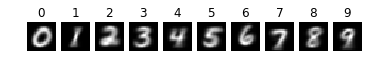

In [56]:
mean_of_class_trn = np.zeros((10,20,20))
#stdev_of_class = np.zeros((10,20,20))

for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    mean_of_class_trn[cls] = np.mean(x_train[idxs], axis=0)
    
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class_trn[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
    
plt.show()

#print('Mean of class \n', mean_of_class)
#print('\n')
#print('standard deviation of class \n', stdev_of_class)

**Compute and visualize the mean of each class in testing data**

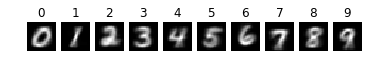

(10, 20, 20)

In [57]:
mean_of_class_test = np.zeros((10,20,20))

for cls in range(number_of_classes):
    idxs = np.where(y_test == cls)[0]
    mean_of_class_test[cls] = np.mean(x_test[idxs],axis=0)
    
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class_test[cls].astype('uint8'), cmap ='gray')
    plt.axis('off')
    plt.title(str(cls))
    
plt.show()
mean_of_class_test.shape 

## Standard deviation

**Compute and display the stdev of each class in training data**

In [60]:
#stdev_of_class = np.zeros((len(x_train),20,20))
stdev_of_class_trn = np.zeros((10,20,20))

for cls in range(number_of_classes):
    # use vectorize calculation
    idxs = np.where(y_train == cls)[0]
    #print(idxs.shape)
    stdev_of_class_trn[cls] = np.std(x_train[idxs], axis=0)

#print('standard deviation of class \n', stdev_of_class_trn[1])
stdev_of_class_trn.shape   

(10, 20, 20)

**Compute and visualize the stdev of each class in testing data**

In [61]:
#stdev_of_class = np.zeros((len(x_train),20,20))
stdev_of_class_test = np.zeros((10,20,20))

for cls in range(number_of_classes):
    # use vectorize calculation
    idxs = np.where(y_test == cls)[0]
    stdev_of_class_test[cls] = np.std(x_test[idxs], axis=0)

#print('standard deviation of class \n', stdev_of_class_test[1])
stdev_of_class_test.shape   

(10, 20, 20)

#### Fitting the training dataset

In [62]:
params = dict()

for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    
    # Creating a dictionary:
    params[cls] = {
        'class': cls,
        'mean': np.mean(x_train[idxs], axis=0),
        'stdev': np.std(x_train[idxs], axis=0)
    }

In [63]:
import math

def gaussian(x, mu, sigma):
    
    if sigma == 0:
        sigma = sigma + 1
    
    return ((x - mu)**2 / sigma**2)

In [64]:
import math

def gaussProbability(x, mean, stdev):
    if stdev == 0:
        stdev = stdev + 1
    
    #exponent = math.exp(-(math.pow(x - mean, 2)/(2*math.pow(stdev, 2))))
    #return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
    return (x - mean)**2


# Denna används inte just nu
def baypredict(dataset):
    
    N = dataset.shape[0]
    K = len(params)
    probs = np.zeros((N, K))
    
    for x, g in params.items():
        mean, stdev = g['mean'], g['stdev']
        probs[:,x] += gaussian(dataset[x], mean[x], stdev[x])
        
    return np.argmax(probs, axis=1)

In [73]:
def predict(params, inputVector):
    probs = {}
    best = np.zeros(1000)
    
    for q in range(len(inputVector)):
        x = inputVector[q]
    
        for i in range(len(params)):
            probs[i] = 0
            mean, stdev = params[i].get('mean'), params[i].get('stdev')
            
            # calculate probability products/sums
            for j in range(len(mean)):
                
                for k in range(len(stdev)):
                    #probs[i] += gaussian(x[j][k], mean[j][k], stdev[j][k])
                    probs[i] += gaussProbability(x[j][k], mean[j][k], stdev[j][k])
        best[q] = min(probs, key=probs.get)
        
    # Printing indices (corresponds to classified)
    print(best)
     
    return best

#### Bayesian Categorization/Classification
Given features x = (x1 , ... , xm ) predict a label y

In [74]:
def NaiveBayesian (x_test):
    
    y_test_pred = predict(params,x_test)
    
    return y_test_pred

## now lets run your code and evaluate your accuracy

In [75]:
# Evaluate your classifier on the test set

y_test_pred = NaiveBayesian(x_test)

test_accuracy = np.mean(y_test == y_test_pred)

print('Test accuracy: ',test_accuracy)

[0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0.
 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 2. 0. 0. 0. 0. 0. 0. 8. 0.
 0. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 5. 0. 0. 2. 0. 0. 5. 5. 5.
 0. 0. 0. 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 5. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 4. 2. 1. 1. 4. 4. 2. 2.
 2. 1. 2. 2. 2. 8. 2. 9. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 6. 2. 1. 2. 2. 2. 2. 6. 4. 2. 2.
 2. 8. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 7. 2. 2. 2. 6. 8. 2. 2. 3. 1. 2. 2.
 0. 2. 2. 2. 2. 2. 0. 2. 1. 2. 0. 2. 3. 3. 3. 9. 3. 5. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 5. 3. 5. 3. 3. 3. 8. 9. 3. 8. 9. 8. 3.

## Let's visualize some of the wrongly classified test samples.

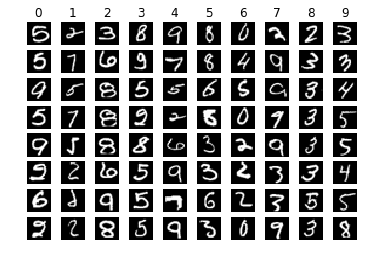

In [69]:
examples_per_class = 8

for cls in range(number_of_classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        
        if i == 0:
            plt.title(str(cls))
            
plt.show()